In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn import preprocessing
from tqdm import tqdm

# Data cleaned

In [14]:
data = pd.read_csv('ar41_for_ulb_cleaned.csv', sep=';')
data

,timestamps_UTC,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
0,2023-08-01 03:44:12,0,181.0,50.769818,3.872114,27.0,23.0,255.0,238.0,794.0,801.0,83.0,81.0,76.0,77.0,14.8,0.0,18.6,0.1
1,2023-08-01 06:36:29,1,143.0,51.039993,3.693429,33.0,32.0,272.0,324.0,802.0,804.0,78.0,78.0,73.0,74.0,14.4,0.0,19.1,1.1
2,2023-08-24 06:53:54,2,183.0,50.742203,3.602035,31.0,33.0,234.0,182.0,799.0,802.0,82.0,82.0,85.0,87.0,18.2,0.0,12.1,2.4
3,2023-08-01 13:53:38,3,177.0,50.930914,5.327132,35.0,38.0,220.0,244.0,794.0,801.0,77.0,81.0,78.0,82.0,19.9,0.2,25.0,12.6
4,2023-08-24 07:02:30,4,143.0,51.180773,3.575259,41.0,34.0,227.0,282.0,806.0,800.0,85.0,78.0,82.0,79.0,18.7,0.0,9.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17096895,2023-05-22 01:15:17,17679268,151.0,50.855825,3.606974,15.0,19.0,307.0,269.0,805.0,792.0,56.0,78.0,52.0,76.0,12.6,0.0,11.8,10.5
17096896,2023-05-22 01:20:50,17679269,155.0,51.015752,3.773998,21.0,21.0,310.0,327.0,798.0,801.0,60.0,62.0,56.0,61.0,12.6,0.0,11.8,10.5
17096897,2023-05-22 01:33:32,17679270,117.0,50.854884,3.605797,26.0,25.0,320.0,307.0,802.0,798.0,76.0,71.0,68.0,66.0,12.6,0.0,11.8,10.5
17096898,2023-05-22 01:33:14,17679271,103.0,50.420423,4.535415,26.0,22.0,227.0,276.0,790.0,800.0,80.0,71.0,78.0,65.0,12.6,0.0,11.8,10.5


Take a portion of the data

In [9]:
portion = 0.2
data = data.sample(frac=portion, random_state=42)
data

,timestamps_UTC,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen
11896629,2023-05-03 06:57:31,12300955,122.0,51.035773,3.709911,35.0,33.0,189.0,255.0,800.0,802.0,78.0,78.0,78.0,79.0,4.0,0.0,10.7,1.2
10121756,2023-02-22 20:30:50,10466460,180.0,51.015379,3.775898,30.0,30.0,296.0,303.0,807.0,818.0,76.0,76.0,73.0,73.0,8.5,0.2,4.7,0.9
2108528,2023-02-07 04:19:11,2181203,104.0,50.337549,4.402965,22.0,31.0,362.0,258.0,1437.0,816.0,80.0,71.0,85.0,74.0,1.6,0.0,8.7,0.0
3456922,2023-05-09 02:44:33,3576296,120.0,50.057586,4.492855,41.0,35.0,210.0,248.0,798.0,799.0,80.0,82.0,77.0,79.0,13.3,0.0,9.8,4.2
9961831,2023-06-16 04:01:06,10301005,170.0,50.770626,3.872044,21.0,33.0,210.0,3.0,804.0,0.0,78.0,34.0,73.0,33.0,15.3,0.0,7.1,94.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095574,2023-02-01 15:09:38,10439331,116.0,51.038860,3.693822,22.0,12.0,247.5,177.0,922.0,799.5,79.0,77.0,81.5,78.5,8.8,0.0,28.8,0.3
3228958,2023-02-09 05:47:35,3340593,162.0,50.753037,3.625202,23.0,40.0,462.0,424.0,1648.0,1635.0,78.0,87.0,81.0,88.0,-2.6,0.0,13.0,0.0
8378187,2023-05-14 12:41:22,8662796,150.0,51.016087,3.773251,18.0,17.0,553.0,529.0,797.5,798.5,29.5,28.0,13.0,16.0,17.5,0.0,9.4,20.6
6547593,2023-01-31 01:15:04,6771150,120.0,50.418822,4.534259,23.0,18.0,210.0,241.0,797.0,802.0,77.0,78.0,75.0,75.0,3.7,0.0,13.2,0.0


**Take columns of interest**

In [15]:
columns_of_interest = ['RS_E_InAirTemp_PC1', 'RS_E_InAirTemp_PC2', 'RS_E_OilPress_PC1',
                         'RS_E_OilPress_PC2', 'RS_E_RPM_PC1', 'RS_E_RPM_PC2', 'RS_E_WatTemp_PC1',
                         'RS_E_WatTemp_PC2', 'RS_T_OilTemp_PC1', 'RS_T_OilTemp_PC2', 'temperature',
                         'precipitation', 'windspeed_10m', 'sum_pollen']

X = data[columns_of_interest].values

# Fuzzy algorithm

Scale data

In [11]:
def scale(data):
    scaler = preprocessing.RobustScaler()
    return scaler.fit_transform(data)

Choose de number of clusters

In [12]:
fpcs = []

for ncenters in tqdm(range(2, 10)):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        scale(X).T, ncenters, 2, error=0.05, maxiter=1000, init=None, seed=3)

    # Store fpc values 
    fpcs.append(fpc)

100%|██████████| 8/8 [25:35<00:00, 191.90s/it]


Text(0, 0.5, 'Fuzzy partition coefficient (FPC)')

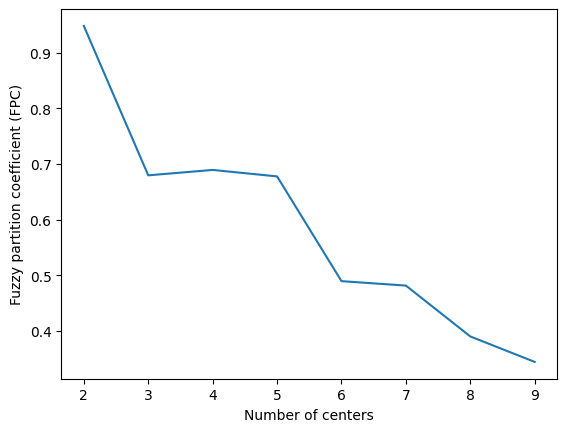

In [13]:
fig1, ax1 = plt.subplots()
ax1.plot(np.r_[2:10], fpcs)
ax1.set_xlabel("Number of centers")
ax1.set_ylabel("Fuzzy partition coefficient (FPC)")

Fuzzy with a specified number of cluster

In [16]:
# Parameters of Fuzzy C-means
n_clusters = 2
m = 2
error_threshold = 0.005
data_T = scale(X).T

# Execution of Fuzzy C-means
cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
    data_T, n_clusters, m, error=error_threshold, maxiter=1000, init=None, seed=3
)

fpc

0.9479345134123734

In [17]:
membership_values = np.argmax(u, axis=0)

In [18]:
elements_cluster = np.bincount(membership_values)

for cluster_num, count in enumerate(elements_cluster):
    print(f"Cluster {cluster_num + 1}: {count} elements")

Cluster 1: 3168802 elements
Cluster 2: 13928098 elements


Mean by cluster

In [19]:
data['cluster'] = membership_values
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
mean = data.groupby('cluster')[numeric_columns].mean()
data = data.drop('cluster', axis=1)
mean

,Unnamed: 0,mapped_veh_id,lat,lon,RS_E_InAirTemp_PC1,RS_E_InAirTemp_PC2,RS_E_OilPress_PC1,RS_E_OilPress_PC2,RS_E_RPM_PC1,RS_E_RPM_PC2,RS_E_WatTemp_PC1,RS_E_WatTemp_PC2,RS_T_OilTemp_PC1,RS_T_OilTemp_PC2,temperature,precipitation,windspeed_10m,sum_pollen,cluster
cluster,,,,,,,,,,,,,,,,,,,
0,8.844983e+06,151.675565,50.934962,4.284653,36.721404,36.911272,371.872123,381.276035,1589.905768,1592.548698,83.658317,83.017055,85.012715,84.926750,13.021806,0.107270,13.507464,17.789261,0.0
1,8.838509e+06,150.664291,50.860732,4.217597,28.678496,28.779761,249.210017,255.971951,795.307889,789.060659,76.437873,75.627196,75.350293,74.900182,12.345388,0.101223,13.278948,17.495036,1.0


Compute the distances

In [38]:
distances = np.linalg.norm(data_T - cntr.T[:, membership_values], axis=0)

Choose the distance threshold

In [30]:
outlier_distance_threshold = 35

Plot distribution of distances

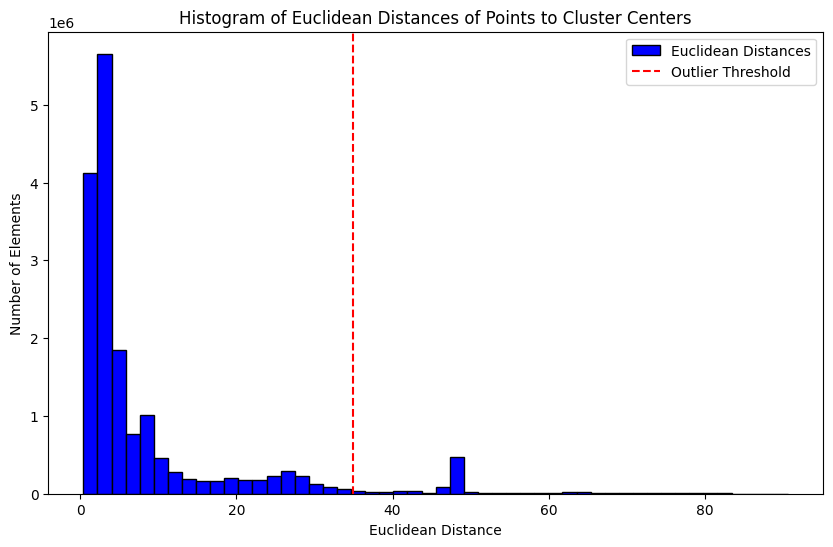

In [31]:
# Create a histogram of Euclidean distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=50, color='b', edgecolor='black', label='Euclidean Distances')
plt.axvline(x=outlier_distance_threshold, color='r', linestyle='--', label='Outlier Threshold')
plt.title('Histogram of Euclidean Distances of Points to Cluster Centers')
plt.xlabel('Euclidean Distance')
plt.ylabel('Number of Elements')
plt.legend()
plt.show()

In [32]:
outliers = data[distances > outlier_distance_threshold]
data['fuzzy'] = (distances > outlier_distance_threshold).astype(int)
print("Number of outliers :", outliers.shape[0])

Number of outliers : 883543


Save in csv

In [33]:
data.to_csv('Fuzzy_with_outlier.csv', index=False, sep=';')